In [ ]:
# * @version 1.0 
# * @FOZ - Universidade Federal de Alagoas
#  *João Gabriel, Marcus Cezar, Sarah Melo, Verena Meirelles

In [ ]:
INTRODUÇÃO:

O Programa de Estímulo à Divulgação de Dados de Qualidade de Água - QUALIÁGUA é uma iniciativa da ANA com os seguintes objetivos:

1. Contribuir para a gestão sistemática dos recursos hídricos:
    Divulgação de dados sobre a qualidade das águas superficiais no Brasil a toda a sociedade;
2. Estimular a padronização dos critérios e métodos de monitoramento de qualidade de água no País, 
    Em acordo com as diretrizes estabelecidas na Resolução ANA nº 903/2013, para tornar essas informações comparáveis em nível nacional;
    Legislação de lançamento de efluentes
3. Contribuir para o fortalecimento e estruturação dos órgãos estaduais gestores de recursos hídricos 
    Monitoramento sistemático da qualidade das águas
    Publicidade aos dados gerados;
4. promover a implementação da Rede Nacional de Monitoramento da Qualidade das Águas - RNQA, 
    Programa Nacional de Avaliação da Qualidade das Águas - PNQA.    
OBJETIVOS
    -O projeto busca executar um mapa interativo com dados de qualidade em postos de monitoramento de água em Alagoas.
    -Reduzir a deficiência do Estado quanto ao registro de dados de qualidade de água;
        -Alagoas não participa da Rede Nacional de Qualidade de Água (REQN);
        -Alagoas não possui Rede Estadual de Qualidade de Água (REQA);

FONTE DOS DADOS:
    -SEMARH
    -http://pnqa.ana.gov.br/Qualiagua.aspx#
    -ANA
    -CASAL
    
METODOLOGIA:
    -Entendimento do problema e solução
    -Determinação de ferramentas e  relação de conteúdos
    -Estrutura do projeto em Jupyter no  GitHub
    -Planejamento de código
    -Execução
    -Divisão de atribuições:
        João Gabriel:
            Elaboração de mapas
        Marcus Cezar:
            Tratamento de dados
        Sarah Melo:
            Análise de dados
        Verena Meirelles:
            Comunicação com o cliente, estruturação dos arquivos

AVALIAÇÃO DE USO POR USUÁRIOS EXTERNOS:
    -Criação de um menu;
    -Docstrings;
    -Leia-me;
    -Exemplos de preenchimento;
    -Sequência lógica para usuário seguir para o caminho que quiser durante o uso do programa,
     retornando às funções principais sempre que desejar.

BOAS PRÁTICAS DE PROGRAMAÇÃO:
    -Comentários
    -Explicar o algoritmo ou a lógica usada, mostrando o objetivo de uma variável

In [ ]:
Os dados a serem trabalhados advém de uma planilha em Excel, como segue exemplo:

In [11]:
import pandas as pd
df = pd.read_excel(r"C:\Users\Sarah\Desktop\DADOS SEMARH - PROCESSO.xlsx")
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Nº PROCESSO,Nº PORTARIA,ANO PORTARIA,LATITUDE,LONGITUDE
1,35010-22271/2004,140,2004,-9.23833,-35.4933
2,23010-16134/2006,420,2007,-9.62796,-35.7958
3,23010-04158/2007,483,2007,-10.1351,-36.1692
4,23010-04365/2007,493,2008,-9.50017,-37.8404


In [ ]:
import pandas as pd
df = pd.read_excel(r"C:\Users\Sarah\Desktop\SEMARH.xlsx")
df.head()

In [ ]:
Os dados deverão ser tratados e analisados, para que o usuário possa analisar os dados ao clicar no ponto desejado.
(repousar o mouse sob os pontos no mapa)

In [9]:
#Recorte por bacia:
#Biblioteca para utilizar o shape:
#Geopandas (Mapbox do plotly está sendo utilizado para testes, segue exemplo abaixo)

import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

mapbox_access_token = 'pk.eyJ1IjoiZ3JycnJicmllbCIsImEiOiJjanh3NWdxbmIwYzk2M2JscmNhZzR0YXg1In0.8a16HnnNkP6vobkSWuspRw'

data = [
    go.Scattermapbox(
        lat=df['LATITUDE'], #Dentro da planilha depois de ''latitude'' tem um espaço
        lon=df['LONGITUDE'],
        mode='markers',
        marker=dict(size=9),
        text='Nº DO PROCESSO: ' + df['Nº PROCESSO'] + 
             ' <br />TURBIDEZ: ' + df['TURBIDEZ'].astype(str) +
             ' <br />DBO: ' + df['DBO'].astype(str) +
             ' <br />COLIFORMES: ' + df['COLIFORMES'].astype(str)
    )
]

layout = go.Layout(
    title = '<b>Exemplo de plotagem de estações</b>',
        titlefont = {'family': 'Arial',
                     'size': 24},
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=-10.116700,
            lon=-36.650002
        ),
        pitch=0,
        zoom=8
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Mapa')

C:\Users\Sarah\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [ ]:
def menu():
    """
        Esta função retorna o menu, para que o usuário possa acessa-lo quando necessario, nao tendo somente as funcoes expostas na apresentacao do programa.
       Ela recebe a opcao do usuario e mostra as operacoes disponiveis.
       ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   
       Parametros:
       entrada1 = string
                Na entrada, o usuário digita uma das funções disponíveis no programa (cadastro de informações, exibir relatorio, análise de dados, exibir mapa.
                O usuario pode digita-las com letras maiusculas ou minusculas,contanto que estejam com a escrita correta, uma vez que as entradas sao convertidas para caixa alta.
       ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------
       Esta funcao nao retorna nenhum resultado alem dos prints de descricao das opcoes, apenas chama outras funcoes.    
    """
    while True:
        print('\nFOZ - Ambiente virtual de análise da Secretaria de Recursos Hídricos e Saneamento de Alagoas\nSeja bem vindo(a)!')
        print('Digite o número do serviço que você deseja executar:\n')
        print('Digite "1" para realizar um novo cadastro')
        print('Digite "2" para atualização cadastral')
        print('Digite "3" para exibir o mapa')
        print('Digite "4" para ver informações de uma determinada matrícula')
        print('Digite "X" se deseja encerrar o programa\n')
        funcao = input('Opção: ')
        if funcao =='1':
            print('\nCADASTRO\n\nPara cadastrar um posto, preencha as informações solicitadas no formulário abaixo e pressione a tecla "Enter" para inserí-las.')
            print('Para alterações em caso de erro, utilize a função "atualização cadastral"\n')
            break
        if funcao == '2':
            print('Você selecionou a opção de atualização Cadastral')
            break
        elif funcao == '3':
            print('Você selecionou a opção de exibir o mapa interativo')
            break
        elif funcao == '4':
            #relatorio()
            break
        elif funcao=='X' or funcao=='x':
            print('\nPrograma Encerrado.\n')
            break
        elif funcao == '':
            print('\nDigite uma entrada válida!\n')
        else:
            print('\nDigite uma entrada válida!\n')
menu()

In [ ]:
Exemplos de documentação de funções que integrarão o programa:

In [ ]:
#FUNÇÕES:
dicionario = {}
#_______________________________________________________________________________________________________________________________________________________________________

def erro():
    """
        Esta função retorna uma mensagem de erro caso o usuario digite uma entrada invalida.
       ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   
       Parametros:
         Esta funcao nao possui parametros, uma vez que apenas exibe a mensagem de erro, caso seja chamada.
       ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------
       Esta funcao retorna uma mensagem de erro.    
    """
#_______________________________________________________________________________________________________________________________________________________________________

def menu(entrada1):
    """
        Esta função retorna o menu, para que o usuário possa acessa-lo quando necessario, nao tendo somente as funcoes expostas na apresentacao do programa.
       Ela recebe a opcao do usuario e mostra as operacoes disponiveis.
       ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   
       Parametros:
       entrada1 = string
                Na entrada, o usuário digita uma das funções disponíveis no programa (cadastro de informações, exibir relatorio, análise de dados, exibir mapa.
                O usuario pode digita-las com letras maiusculas ou minusculas,contanto que estejam com a escrita correta, uma vez que as entradas sao convertidas para caixa alta.
       ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------
       Esta funcao nao retorna nenhum resultado alem dos prints de descricao das opcoes, apenas chama outras funcoes.    
    """
#_______________________________________________________________________________________________________________________________________________________________________

def cadastro():
    """
        Esta função e a funcao de cadastro. Ela chama as funcoes de insercao de dados da estação, que sao:
        dbo, dqo.
            
       ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   
       Parametros:
       As entradas estao inseridas dentro das funcoes que compoe o cadastro.
       ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------
       Esta funcao nao retorna nenhum resultado alem dos prints de descricao das opcoes, apenas chama outras funcoes e cria um dicionario que contem outros dicionarios.
       
    """

#_______________________________________________________________________________________________________________________________________________________________________


#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
def situacao_agua(entrada1 ):
    
    """
        Esta funcao recebe a situacao da agua do imovel e a adiciona no dicionario. As opcoes sao 'ATENDE A LEGISLAÇÃO' e 'NÃO ATENDE'
       ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   
       Parametros:
       entrada1 = int
                A funcao recebe a entrada do usuario (inteiros contendo opcoes especificadas num print previo, que contem todas as opcoes citadas acima e seus correspondentes
                codigos de escolha), e insere a opcao escolhida no dicionario que tem a matricula como chave, onde os outros dados cadastrais estao inseridos.
                Caso o usuario digite uma entrada invalida, a funcao e chamada ate que uma entrada valida seja inserida.
       ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------
       Esta funcao nao retorna nenhum resultado, apenas uma mensagem de erro caso o usuario digite uma entrada invalida. 
    """  
                   
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

def exibir_relatorio_geral(entrada1):
"""  
        Essa função tem como objetivo exibir o relatório geral das estações.
---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   
       Parametros:
       entrada1 = int
                A única entrada dessa função refere-se ao setor onde a acao esta sendo executada.
---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------
       Esta funcao retorna um print do relatório geral das estações, contendo todos os dados inseridos  e uma mensagem de erro caso o usuario digite uma entrada invalida. 
""" 
#_______________________________________________________________________________________________________________________________________________________________________
def mapa (entrada1):
"""  
        Essa função tem como objetivo exibir o mapa das estações.
---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   
       Parametros:
       entrada1 = int
                A única entrada dessa função refere-se ao desejo de exibir ou não o mapa.
---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------
       Esta funcao retorna um print do mapa. 
"""  
#_______________________________________________________________________________________________________________________________________________________________________
def analise(entrada1):
def mapa (entrada1):
"""  
        Essa função tem como objetivo analisar se os dados estao atendendo a legislacao.
---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   
       Parametros:
       entrada1 = int
                A única entrada dessa função refere-se ao nome da estacao a ser analisada.
---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------   ---------
       Esta funcao retorna um print com os dados da estacao, por dados de api. 
"""      

In [ ]:
Os dados devem ser tratados, ainda para que haja análise se os parâmetros estão sendo obedecidos de acordo com as
legislações vigentes (Portaria de Consolidação nº 5/2017, MS – Anexo XX, CONAMA 420/2011)
    -Exibir observação caso o ponto não esteja obedecendo aos padrões das portarias

In [6]:
DBO_posto1 = float(input('Digite a DBO do efluente:'))
print()
if DBO_posto1 >=5:
    print('DBO fora dos padrões exigidos')
else:
    print('DBO = ', DBO_posto1)

Digite a DBO do efluente:5

DBO fora dos padrões exigidos


In [ ]:
Mapa mental do projeto:
    (https://coggle.it/diagram/XSTu8KMV3YEq3LAG/t/-)

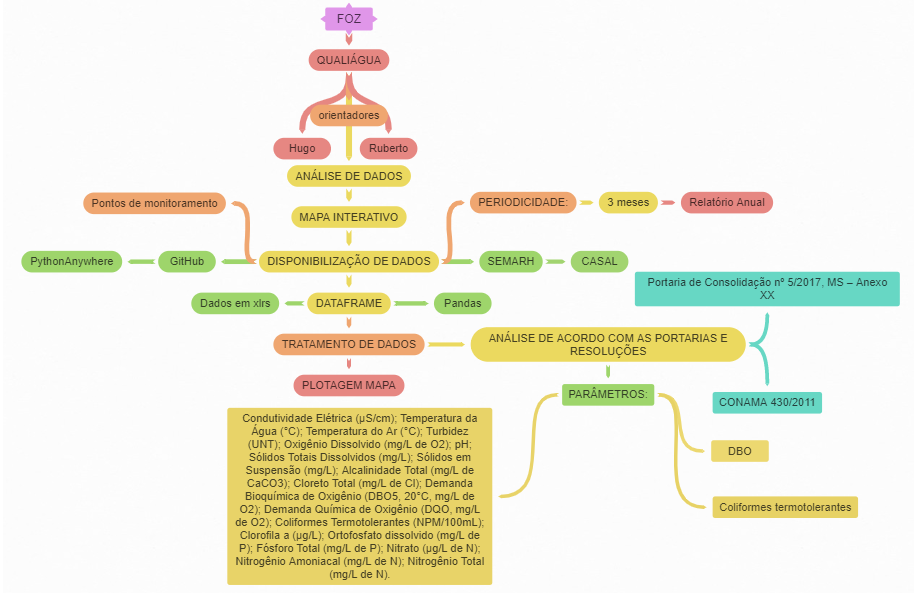

In [18]:
from IPython.display import Image
Image(filename='SEMARH - MAPA MENTAL.png')

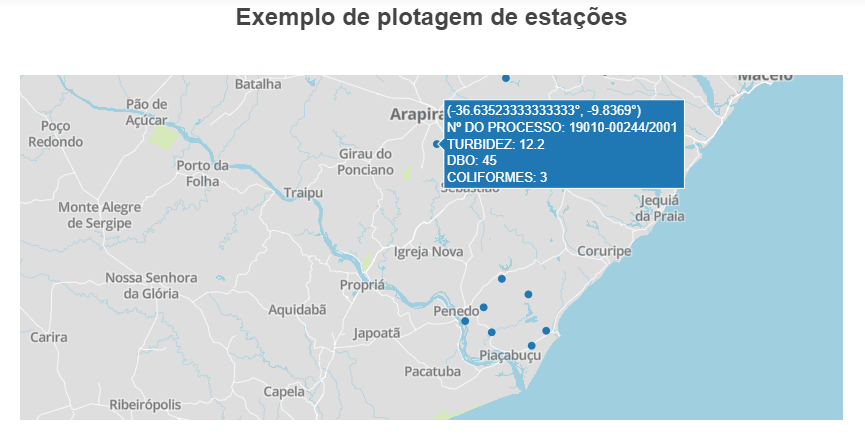

In [19]:
from IPython.display import Image
Image(filename='EXEMPLO GRAFICO.png')